# TS 201: Prophet Demo - Peyton Manning Page Views

This notebook demonstrates how to use **Facebook Prophet** to forecast time series data, specifically looking at the daily Wikipedia page views for Peyton Manning. This accompanies the blog post **TS 201: Prophet**.

## 1. Setup and Data Loading

First, we install and import the necessary libraries.

In [1]:
!pip install pandas prophet matplotlib

In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv'
df = pd.read_csv(url)

# Prophet requires columns 'ds' (date) and 'y' (value)
df.head()

Importing plotly failed. Interactive plots will not work.


,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


## 2. Model Fitting

We initialize the `Prophet` model and fit it to our data. Prophet automatically handles the daily seasonality and potential trend changes.

In [3]:
m = Prophet()
m.fit(df)

11:09:10 - cmdstanpy - INFO - Chain [1] start processing
11:09:11 - cmdstanpy - INFO - Chain [1] done processing


## 3. Forecasting

To forecast, we first create a dataframe with future dates. Here, we'll forecast 365 days into the future.

In [4]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


Now we predict the future values. The `forecast` dataframe contains the predicted `yhat`, as well as the components and uncertainty intervals.

In [5]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.210119,7.496864,8.906282
3266,2017-01-16,8.535144,7.795778,9.283647
3267,2017-01-17,8.322571,7.609316,9.034911
3268,2017-01-18,8.155201,7.444263,8.905965
3269,2017-01-19,8.167158,7.430032,8.908585


## 4. Visualization

We can plot the forecast to see the trend and seasonality.

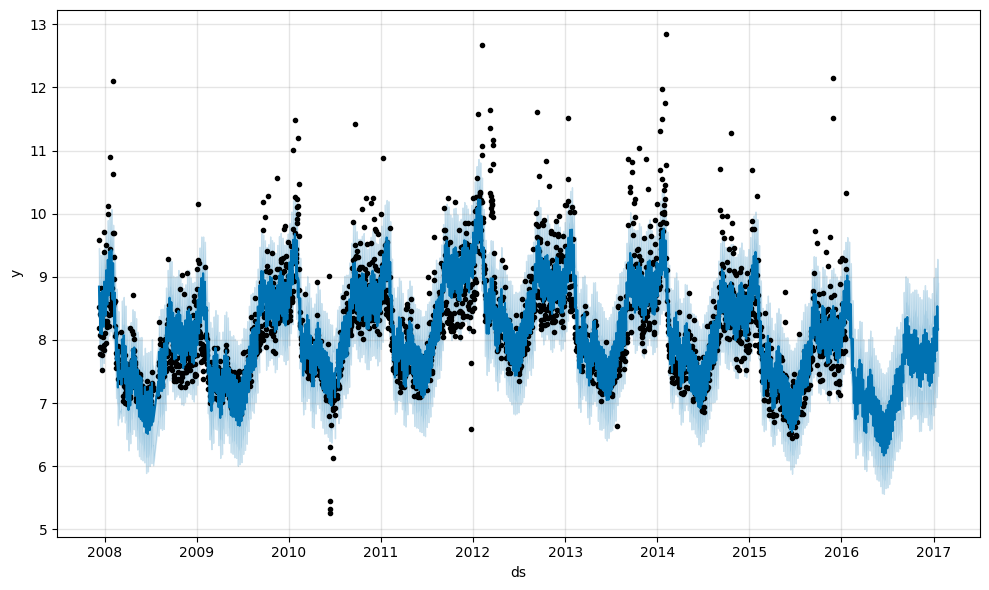

In [6]:
fig1 = m.plot(forecast)

We can also decompose the forecast into its components: Trend, Weekly Seasonality, and Yearly Seasonality.

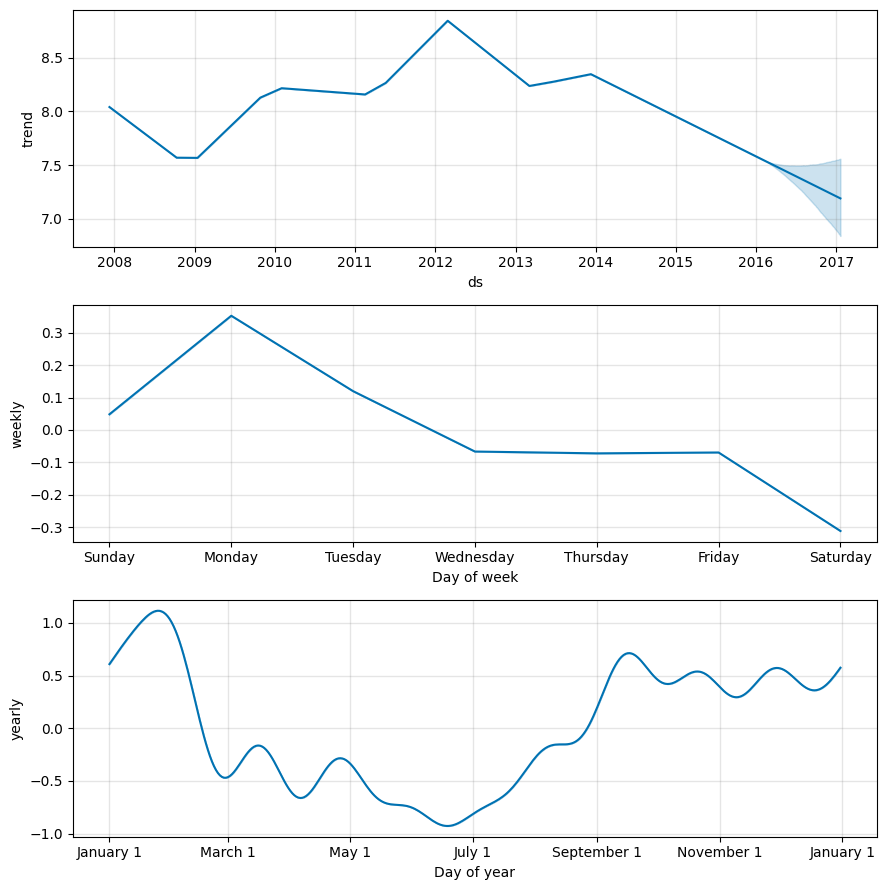

In [7]:
fig2 = m.plot_components(forecast)

## 5. Numerical Example: Super Bowl 50

As discussed in the blog post, let's look at the specific forecast for **February 7, 2016** (Super Bowl 50).

In [8]:
target_date = '2016-02-07'
row = forecast[forecast['ds'] == target_date]

print(f"Forecast for {target_date}:")
print(f"Trend: {row['trend'].values[0]:.4f}")
print(f"Weekly: {row['weekly'].values[0]:.4f}")
print(f"Yearly: {row['yearly'].values[0]:.4f}")
print(f"yhat (Sum): {row['yhat'].values[0]:.4f}")

Forecast for 2016-02-07:
Trend: 7.5426
Weekly: 0.0483
Yearly: 0.7397
yhat (Sum): 8.3305
